# Importando Bibliotecas

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Abrindo arquivo com os dados de acidentes

In [56]:
# Carregar o dataset
df = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", sep=',', low_memory=False)

# Exemplo de pré-processamento (ajuste conforme necessário)
# Supondo que as colunas de interesse são 'Year', 'Month', 'Day', 'Hour', 'Cause', 'Number_of_Victims', 'Weather', etc.

# Remover colunas desnecessárias (ajuste conforme necessário)
df = df[[ 'Month', 'Age Group','Speed Limit']]

# Tratar valores ausentes
df.dropna(inplace=True)

# Converter variáveis categóricas em variáveis numéricas
df2 = pd.get_dummies(df, columns=[ 'Age Group','Speed Limit'])

print(df2)

       Month  Age Group_0_to_16  Age Group_17_to_25  Age Group_26_to_39  \
1          9              False               False                True   
5          9              False                True               False   
6          9              False                True               False   
9          9              False               False               False   
10         9              False                True               False   
...      ...                ...                 ...                 ...   
52838      1               True               False               False   
52839      1              False                True               False   
52840      1              False                True               False   
52841      1              False                True               False   
52842      1              False               False               False   

       Age Group_40_to_64  Age Group_65_to_74  Age Group_75_or_older  \
1                   False  

       Month  Age Group_0_to_16
1          9              False
5          9              False
6          9              False
9          9              False
10         9              False
...      ...                ...
52838      1               True
52839      1              False
52840      1              False
52841      1              False
52842      1              False

[52056 rows x 2 columns]
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     15617

    accuracy                           1.00     15617
   macro avg       1.00      1.00      1.00     15617
weighted avg       1.00      1.00      1.00     15617

Confusion Matrix:
[[15617]]


c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


[Text(0.4, 0.875, 'Month <= 6.5\ngini = 0.0\nsamples = 36439\nvalue = [36437.0, 2.0]\nclass = Nao merreu'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 17987\nvalue = [17987, 0]\nclass = Nao merreu'),
 Text(0.6, 0.625, 'Month <= 7.5\ngini = 0.0\nsamples = 18452\nvalue = [18450, 2]\nclass = Nao merreu'),
 Text(0.4, 0.375, 'Age Group_0_to_16 <= 0.5\ngini = 0.001\nsamples = 2992\nvalue = [2990.0, 2.0]\nclass = Nao merreu'),
 Text(0.2, 0.125, 'gini = 0.001\nsamples = 2754\nvalue = [2752, 2]\nclass = Nao merreu'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 238\nvalue = [238, 0]\nclass = Nao merreu'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 15460\nvalue = [15460, 0]\nclass = Nao merreu')]

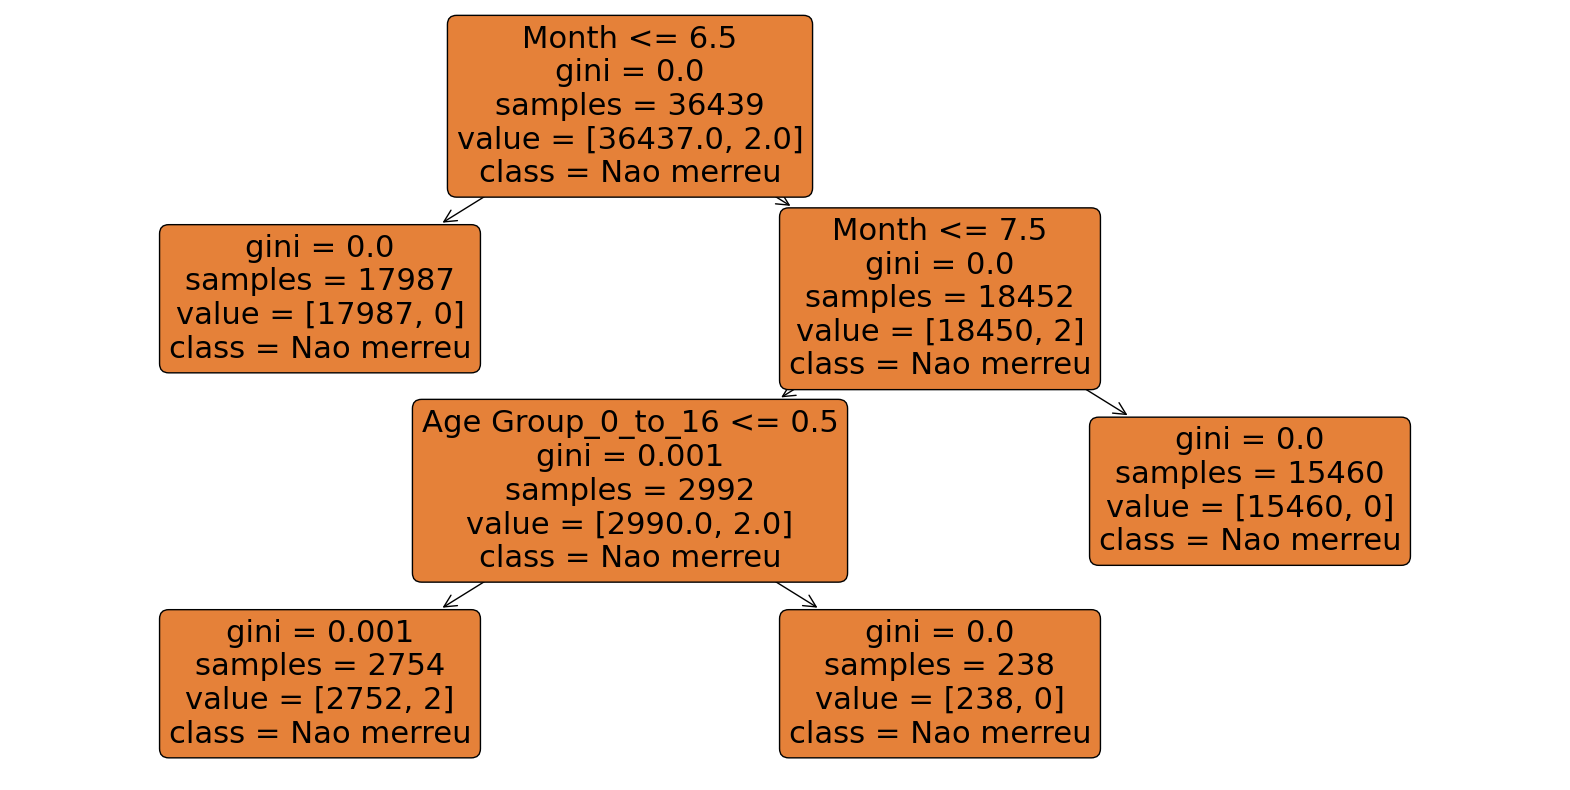

In [64]:
x = df2.iloc[:,:2]
y = df2.iloc[:,-1]  

print(x)

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inicializar o modelo de Árvore de Decisão
clf = tree.DecisionTreeClassifier()

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)


# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Opcional: Visualizar a árvore de decisão
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Nao merreu', 'Merreu'], rounded=True)
#plt.show()